In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP5D,Kitsap,Bremerton,WA,98310.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,23.0,214384901,POINT (-122.61136499999998 47.575195000000065),PUGET SOUND ENERGY INC,5.303508e+10
1,1N4AZ1CP8K,Kitsap,Port Orchard,WA,98366.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,26.0,271008636,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJXCAE28L,King,Seattle,WA,98199.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,36.0,8781552,POINT (-122.394185 47.63919500000003),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,SADHC2S1XK,Thurston,Olympia,WA,98503.0,2019,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,234,0,2.0,8308492,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,5.306701e+10
4,JN1AZ0CP9B,Snohomish,Everett,WA,98204.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,21.0,245524527,POINT (-122.24128499999995 47.91088000000008),PUGET SOUND ENERGY INC,5.306104e+10


In [3]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
138774,KNAGV4LD6L,Clark,Vancouver,WA,98686.0,2020,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,28,0,17.0,122272881,POINT (-122.64839529999995 45.70104270000007),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
138775,7SAYGDEE1N,Thurston,Lacey,WA,98503.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,187390038,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,5.306701e+10
138776,5YJYGDEE7M,Benton,Richland,WA,99352.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,8.0,181300416,POINT (-119.29441499999996 46.27187500000008),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,5.300501e+10
138777,WBY33AW08P,Pierce,Tacoma,WA,98443.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,25.0,224612055,POINT (-122.36463499999996 47.19449000000003),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10
138778,JN1AZ0CP2B,King,Seattle,WA,98118.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,37.0,246621546,POINT (-122.28338999999994 47.549285000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [4]:
df = df.drop(["VIN (1-10)","County","Base MSRP","Vehicle Location","State"], axis=1)
df

,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract
0,Bremerton,98310.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,23.0,214384901,PUGET SOUND ENERGY INC,5.303508e+10
1,Port Orchard,98366.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,26.0,271008636,PUGET SOUND ENERGY INC,5.303509e+10
2,Seattle,98199.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,36.0,8781552,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,Olympia,98503.0,2019,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,234,2.0,8308492,PUGET SOUND ENERGY INC,5.306701e+10
4,Everett,98204.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,21.0,245524527,PUGET SOUND ENERGY INC,5.306104e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
138774,Vancouver,98686.0,2020,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,28,17.0,122272881,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
138775,Lacey,98503.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,22.0,187390038,PUGET SOUND ENERGY INC,5.306701e+10
138776,Richland,99352.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,8.0,181300416,BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,5.300501e+10
138777,Tacoma,98443.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,25.0,224612055,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10


In [5]:
cat = df.select_dtypes(exclude = ['int', 'float'])
print(cat.columns)

Index(['City', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Utility'],
      dtype='object')


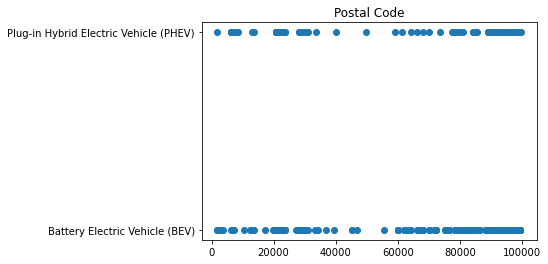

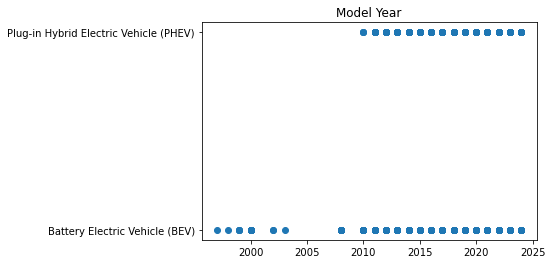

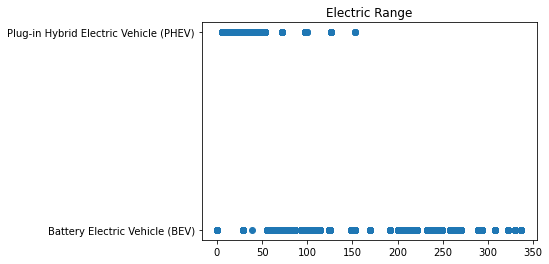

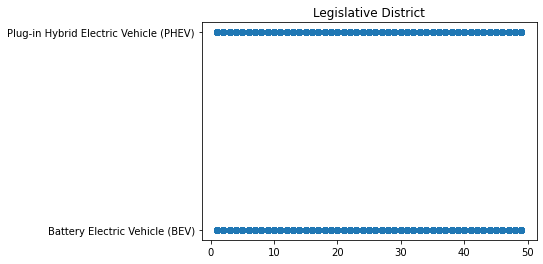

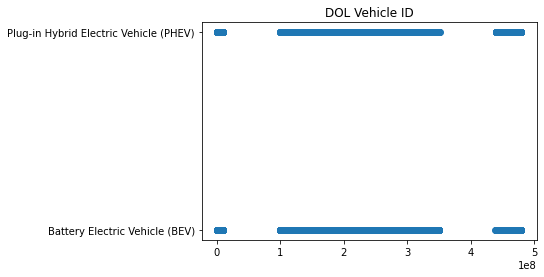

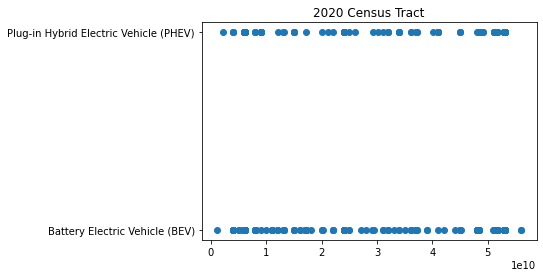

In [6]:
num = df.select_dtypes(exclude = ['object'])
for k in num:
    if k!= 'Electric Vehicle Type':
        plt.scatter(df[k],df['Electric Vehicle Type'])
        plt.title(k)
        plt.show()

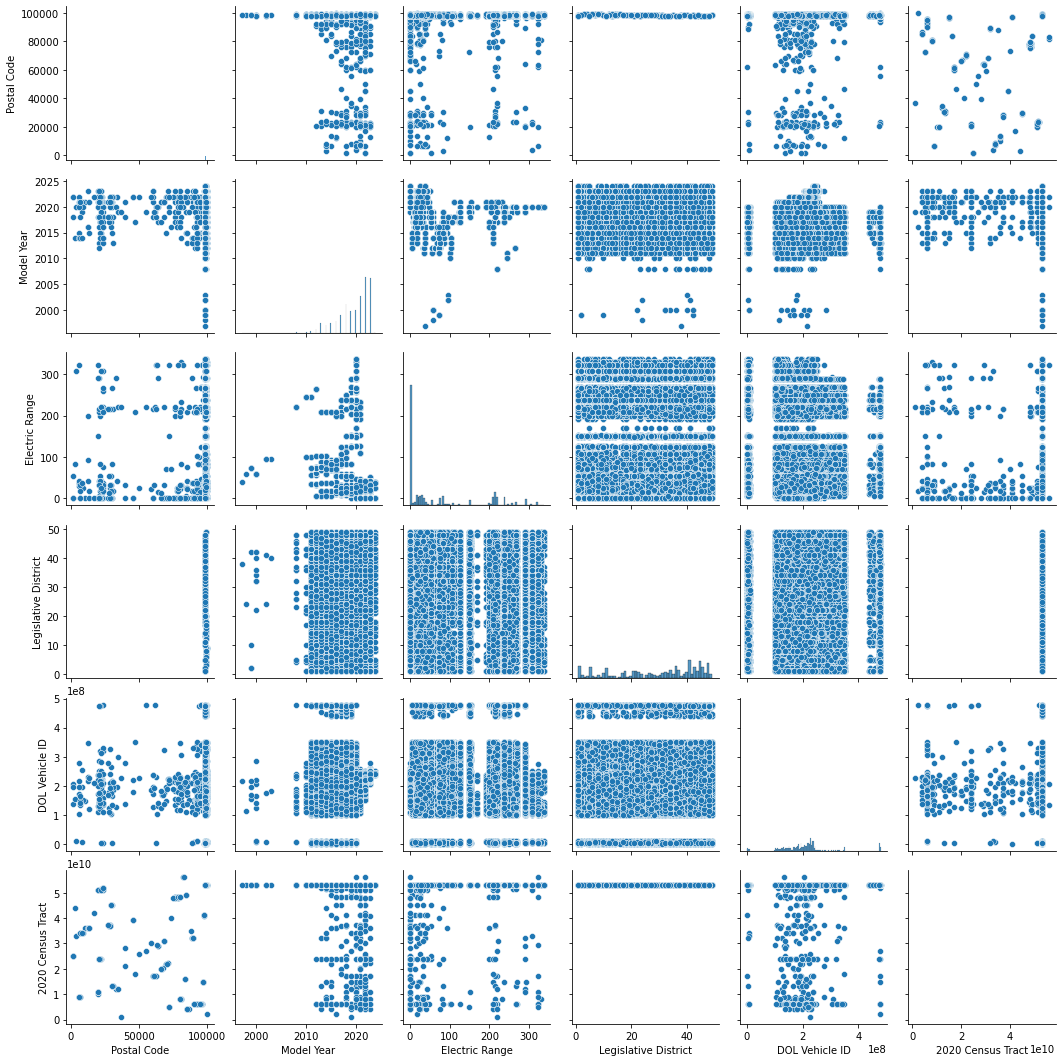

In [500]:
import seaborn as sns
sns.pairplot(df)


NameError: name 'sns' is not defined

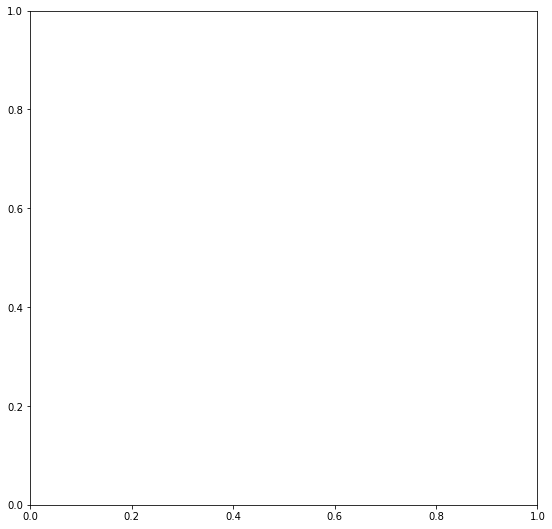

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(df["Model Year"])
plt.subplot(2,2,2)
sns.boxplot(df["Electric Range"])
plt.show()

In [8]:
Q1 = df["Model Year"].quantile(0.25)
Q3 = df["Model Year"].quantile(0.75)
QR = Q3 - Q1

lower_bound = Q1 - 1.5*QR
upper_bound = Q3 + 1.5*QR
df = df[(df["Model Year"] >= lower_bound) & (df["Model Year"] <= upper_bound)]


In [10]:
df

,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract
0,Bremerton,98310.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,23.0,214384901,PUGET SOUND ENERGY INC,5.303508e+10
1,Port Orchard,98366.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,26.0,271008636,PUGET SOUND ENERGY INC,5.303509e+10
2,Seattle,98199.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,36.0,8781552,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,Olympia,98503.0,2019,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,234,2.0,8308492,PUGET SOUND ENERGY INC,5.306701e+10
5,Selah,98942.0,2018,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,13.0,474699725,PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
138773,Bothell,98021.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,1.0,148432826,PUGET SOUND ENERGY INC,5.306105e+10
138774,Vancouver,98686.0,2020,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,28,17.0,122272881,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
138775,Lacey,98503.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,22.0,187390038,PUGET SOUND ENERGY INC,5.306701e+10
138776,Richland,99352.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,8.0,181300416,BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,5.300501e+10


In [11]:
Q3 = df["Electric Range"].quantile(0.25)
Q4 = df["Electric Range"].quantile(0.75)
QR1 = Q4 - Q3

lower_bound = Q3 - 1.5*QR1
upper_bound = Q4 + 1.5*QR1
df = df[(df["Electric Range"] >= lower_bound) & (df["Electric Range"] <= upper_bound)]

In [12]:
df.isnull().sum()

City                                                   2
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                286
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Legislative District                                 314
DOL Vehicle ID                                         0
Electric Utility                                       2
2020 Census Tract                                      2
dtype: int64

In [13]:
df["Electric Vehicle Type"].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [14]:
df["Electric Vehicle Type"]= (df["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)").astype(int)

In [15]:
df.head()


,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract
0,Bremerton,98310.0,2013,NISSAN,LEAF,1,Clean Alternative Fuel Vehicle Eligible,75,23.0,214384901,PUGET SOUND ENERGY INC,5.303508e+10
1,Port Orchard,98366.0,2019,NISSAN,LEAF,1,Clean Alternative Fuel Vehicle Eligible,150,26.0,271008636,PUGET SOUND ENERGY INC,5.303509e+10
2,Seattle,98199.0,2020,TESLA,MODEL X,1,Clean Alternative Fuel Vehicle Eligible,293,36.0,8781552,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,Olympia,98503.0,2019,JAGUAR,I-PACE,1,Clean Alternative Fuel Vehicle Eligible,234,2.0,8308492,PUGET SOUND ENERGY INC,5.306701e+10
5,Selah,98942.0,2018,CHEVROLET,VOLT,0,Clean Alternative Fuel Vehicle Eligible,53,13.0,474699725,PACIFICORP,5.307700e+10


In [16]:
temp_cols=df.columns.tolist()

index=df.columns.get_loc("Electric Vehicle Type")

new_cols= temp_cols[0:index] + temp_cols[index+1:]+ temp_cols[index:index+1]

df=df[new_cols]



In [17]:
df.head()

,City,Postal Code,Model Year,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Electric Vehicle Type
0,Bremerton,98310.0,2013,NISSAN,LEAF,Clean Alternative Fuel Vehicle Eligible,75,23.0,214384901,PUGET SOUND ENERGY INC,5.303508e+10,1
1,Port Orchard,98366.0,2019,NISSAN,LEAF,Clean Alternative Fuel Vehicle Eligible,150,26.0,271008636,PUGET SOUND ENERGY INC,5.303509e+10,1
2,Seattle,98199.0,2020,TESLA,MODEL X,Clean Alternative Fuel Vehicle Eligible,293,36.0,8781552,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,1
3,Olympia,98503.0,2019,JAGUAR,I-PACE,Clean Alternative Fuel Vehicle Eligible,234,2.0,8308492,PUGET SOUND ENERGY INC,5.306701e+10,1
5,Selah,98942.0,2018,CHEVROLET,VOLT,Clean Alternative Fuel Vehicle Eligible,53,13.0,474699725,PACIFICORP,5.307700e+10,0


In [18]:
pd.set_option('use_inf_as_na',True)

In [19]:
df.columns[df.isna().any()]

Index(['City', 'Postal Code', 'Model', 'Legislative District',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [21]:
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])
df['Model'] = df['Model'].fillna(df['Model'].mode()[0])
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].mode()[0])
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])
df['2020 Census Tract'] = df['2020 Census Tract'].fillna(df['2020 Census Tract'].mode()[0])

In [22]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["City", "Make", "Model", "Clean Alternative Fuel Vehicle (CAFV) Eligibility", "Electric Utility"]

label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [24]:
df

,City,Postal Code,Model Year,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Electric Vehicle Type
0,57,98310.0,2013,24,69,0,75,23.0,214384901,73,5.303508e+10,1
1,444,98366.0,2019,24,69,0,150,26.0,271008636,73,5.303509e+10,1
2,515,98199.0,2020,30,73,0,293,36.0,8781552,57,5.303301e+10,1
3,405,98503.0,2019,13,57,0,234,2.0,8308492,73,5.306701e+10,1
5,520,98942.0,2018,5,114,0,53,13.0,474699725,65,5.307700e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
138773,55,98021.0,2021,30,74,1,0,1.0,148432826,73,5.306105e+10,1
138774,609,98686.0,2020,15,78,2,28,17.0,122272881,36,5.301104e+10,0
138775,283,98503.0,2022,30,74,1,0,22.0,187390038,73,5.306701e+10,1
138776,472,99352.0,2021,30,74,1,0,8.0,181300416,12,5.300501e+10,1


In [25]:
cols_to_scale = ['City','Postal Code','Model Year','Make','Model','Electric Range','Legislative District','DOL Vehicle ID','Electric Utility','2020 Census Tract']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [26]:
df

,City,Postal Code,Model Year,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Electric Vehicle Type
0,0.087289,0.985802,0.083333,0.727273,0.575000,0,0.222552,0.458333,0.447325,0.973333,0.945445,1
1,0.679939,0.986374,0.583333,0.727273,0.575000,0,0.445104,0.520833,0.565475,0.973333,0.945445,1
2,0.788668,0.984669,0.666667,0.909091,0.608333,0,0.869436,0.729167,0.018314,0.760000,0.945407,1
3,0.620214,0.987772,0.583333,0.393939,0.475000,0,0.694362,0.020833,0.017327,0.973333,0.946026,1
5,0.796325,0.992253,0.500000,0.151515,0.950000,0,0.157270,0.250000,0.990495,0.866667,0.946208,0
...,...,...,...,...,...,...,...,...,...,...,...,...
138773,0.084227,0.982852,0.750000,0.909091,0.616667,1,0.000000,0.000000,0.309710,0.973333,0.945917,1
138774,0.932619,0.989640,0.666667,0.454545,0.650000,2,0.083086,0.333333,0.255124,0.480000,0.945007,0
138775,0.433384,0.987772,0.833333,0.909091,0.616667,1,0.000000,0.437500,0.390997,0.973333,0.946026,1
138776,0.722818,0.996438,0.750000,0.909091,0.616667,1,0.000000,0.145833,0.378291,0.160000,0.944898,1


In [27]:
x = df.iloc[:, :-1].values
y = df["Electric Vehicle Type"].values

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6381
           1       1.00      1.00      1.00     21206

    accuracy                           0.99     27587
   macro avg       0.99      0.99      0.99     27587
weighted avg       0.99      0.99      0.99     27587



In [31]:
knn_model.score(x_test,y_test)

0.9935114365461993

Naive Bayes Classification Model

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [33]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [34]:
print(classification_report(y_test, y_pred))
model.score(x_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6381
           1       0.97      0.96      0.96     21206

    accuracy                           0.94     27587
   macro avg       0.91      0.93      0.92     27587
weighted avg       0.94      0.94      0.94     27587



0.9423641570304854

LOGISTIC REGRESSION

In [36]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.72      0.77      6381
           1       0.92      0.95      0.94     21206

    accuracy                           0.90     27587
   macro avg       0.87      0.84      0.85     27587
weighted avg       0.90      0.90      0.90     27587



In [37]:
lg_model.score(x_test,y_test)

0.8994453909450103

SUPPORT VECTOR MACHINE MODEL


In [39]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6381
           1       1.00      1.00      1.00     21206

    accuracy                           1.00     27587
   macro avg       0.99      1.00      0.99     27587
weighted avg       1.00      1.00      1.00     27587



In [41]:
svm_model.score(x_test,y_test)

0.9956138761010621


DECISION TREE MODEL

In [690]:
dt_model.score(x_test,y_test)

1.0